<a href="https://colab.research.google.com/github/kristienguyen100/Yelp_NLP_Restaurants/blob/main/Yelp_Review_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

## **Load the Data**

In [ ]:
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1K_obpn0lcDoW0pdEpyfunJ14-h0cM4XM/view?usp=sharing'
  
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('yelp_business.csv')   

In [ ]:
data = pd.read_csv('yelp_business.csv') 
data.head()

,business_id,name,city,state,stars,review_count,categories
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,Champaign,IL,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo..."
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,Aurora,ON,4.5,4,"Restaurants, Cheesesteaks, Poutineries"
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,Thornhill,ON,4.5,7,"Japanese, Fast Food, Food Court, Restaurants"
3,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,Richmond Hill,ON,3.0,3,"Persian/Iranian, Turkish, Middle Eastern, Rest..."
4,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ,4.0,10,"Food, Pretzels, Bakeries, Fast Food, Restaurants"


In [ ]:
new_link = 'https://drive.google.com/file/d/1_WxBh1KHMfo1CQTYhKaLybAnRrZY9E14/view?usp=sharing'
  
id = new_link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('yelp_business_review_data.csv')  

In [ ]:
#yelp df with reviews 
new_yelp_df =  pd.read_csv('yelp_business_review_data.csv') 
new_yelp_df.head()

,business_id,name,city,state,stars,review_count,categories,review_id,review_stars,useful,funny,cool,text,date
0,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",rFfxQEA9wCmRYyqDSv1ecQ,4,0,1,0,Went here for all you can eat sushi dinner! Bo...,2017-11-11 19:16:19
1,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",MccdpC7TvFCTKO5Pdx37PA,1,1,1,0,The service was okay when it was present. The ...,2016-02-27 08:03:55
2,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",OS_uA1Dm7iV4NLGcgtZ9qw,5,0,0,1,Went here on the weekend for lunch and food/se...,2015-11-09 23:03:17
3,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",q37oYWTdZmXC8Z26nTR87Q,5,0,0,0,I've eaten here twice now and I'm really impre...,2017-07-12 16:52:23
4,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",5w3lP3O8ZUO9kOTfQFi8pQ,1,1,1,1,Not good for groups.\n We came here tonight fo...,2016-04-04 05:57:54


In [ ]:
new_yelp_df.shape

(16769, 14)

## **Downsizing the Data**

In [ ]:
#count the number of labels in categories 
data['label_length'] = [len(i.split(',')) for i in data.categories]
data.head(5)

,business_id,name,city,state,stars,review_count,categories,label_length
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,Champaign,IL,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",8
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,Aurora,ON,4.5,4,"Restaurants, Cheesesteaks, Poutineries",3
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,Thornhill,ON,4.5,7,"Japanese, Fast Food, Food Court, Restaurants",4
3,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,Richmond Hill,ON,3.0,3,"Persian/Iranian, Turkish, Middle Eastern, Rest...",5
4,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ,4.0,10,"Food, Pretzels, Bakeries, Fast Food, Restaurants",5


In [ ]:
#sampling method: from the top 60 categories (where label length is less than 4), we do stratified sampling by stars

t = data[data['label_length'] < 4]

t2 = t.pivot_table(index = 'categories', values = ['business_id', 'review_count'], 
                   aggfunc = {'business_id':'count', 'review_count': 'sum'})
t2.reset_index(inplace = True)
t2.sort_values(by = 'business_id', ascending = False).iloc[:20, :]


,categories,business_id,review_count
1103,"Pizza, Restaurants",749,24358
1752,"Restaurants, Pizza",737,26427
1365,"Restaurants, Chinese",577,27043
986,"Mexican, Restaurants",552,46691
428,"Chinese, Restaurants",515,26203
1680,"Restaurants, Mexican",509,52016
1976,"Sandwiches, Restaurants, Fast Food",315,2981
1796,"Restaurants, Sandwiches, Fast Food",313,3152
851,"Italian, Restaurants",245,20507
1605,"Restaurants, Italian",222,19674


In [ ]:
top_60_cat = t2.sort_values(by = 'business_id', ascending = False).iloc[:60, :].categories

In [ ]:
yelp_df = pd.DataFrame()

for i in top_60_cat:
    df = data[data['categories'] == i]
    sample = df.groupby('stars').apply(lambda x: x.sample(n=1, random_state = 0))
    
    yelp_df = pd.concat([sample, yelp_df])

yelp_df['review_count'].sum()

21217

In [ ]:
yelp_df

business_id  ... label_length
stars                                ...             
1.0   21896  zKeHgMw_yYcTuwxM4NDsbA  ...            2
1.5   29020  OuqG_7GBiZbZkKCnAGM-PA  ...            2
2.0   31483  PQq8lVMr5MK4o3tFU6tHEQ  ...            2
2.5   18385  -tA1NsBZIIhC2HeYt-hffw  ...            2
3.0   21701  hDrdznB4GLdP8TpwHsakRg  ...            2
...                             ...  ...          ...
      14136  -uYAkAplo7a4WM7c6lDrWQ  ...            2
3.5   14911  fmQj7chzVaPJOSdBNFL16Q  ...            2
4.0   15726  UdM19HkLvzLRL8FCA7O4Cg  ...            2
4.5   19140  DiPoz83ZwapkT1LfjfaikA  ...            2
5.0   15577  QBRq4Bh1c9JvLnUOzCVqbQ  ...            2

[480 rows x 8 columns]

# **Exporatory Data Analysis**


In [ ]:
#check percentage of null values in dataframe
yelp_df.isnull().sum() * 100 / len(yelp_df)

business_id     0.0
name            0.0
city            0.0
state           0.0
stars           0.0
review_count    0.0
categories      0.0
label_length    0.0
dtype: float64

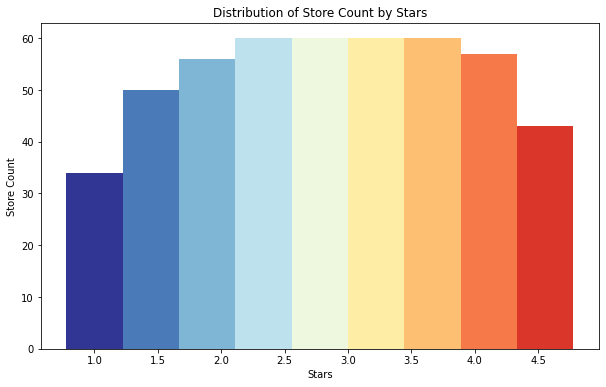

In [ ]:
plt.figure(figsize=(10,6))
cm = plt.cm.get_cmap('RdYlBu_r')

# Get the histogramp
Y,X = np.histogram(yelp_df['stars'], bins = 9 )
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]
plt.title('Distribution of Store Count by Stars')
plt.xlabel('Stars')
plt.ylabel('Store Count')
plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])

plt.show()

(0.0, 500.0)

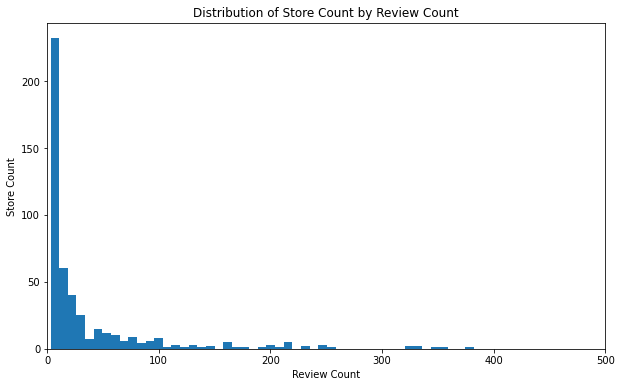

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(yelp_df['review_count'], bins = 150)
plt.title('Distribution of Store Count by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Store Count')
plt.xlim((0,500))

Text(0, 0.5, 'Store Count')

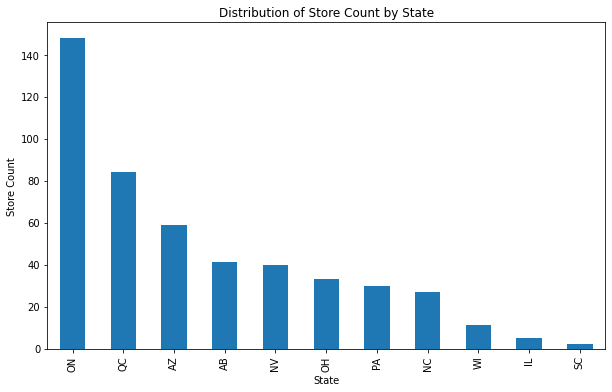

In [ ]:
yelp_df['state'].value_counts().plot(kind = 'bar', figsize = (10,6))
plt.title('Distribution of Store Count by State')
plt.xlabel("State")
plt.ylabel("Store Count")

Text(0.5, 0.98, 'Text Length by Review Stars')

<Figure size 1008x432 with 0 Axes>

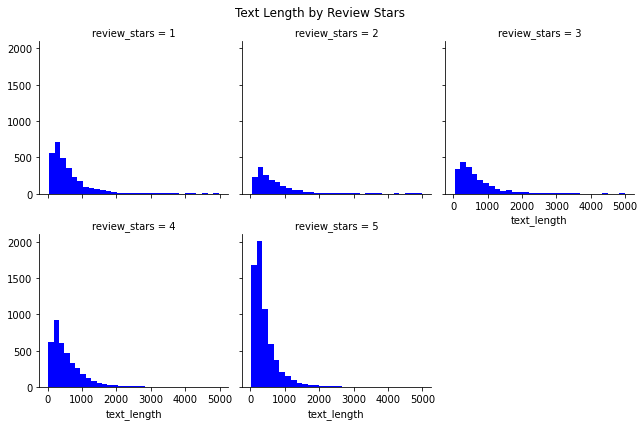

In [ ]:
#calculate the length of each review 
new_yelp_df['text_length'] = new_yelp_df['text'].apply(len)

#review length by stars
plt.figure(figsize=(14,6))
g = sns.FacetGrid(data=new_yelp_df, col='review_stars', height=3, col_wrap=3)
g.map(plt.hist, 'text_length', bins=30, color='b')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Text Length by Review Stars")

[Text(0, 0.5, 'Text Length'),
 Text(0.5, 0, 'Review Stars'),
 Text(0.5, 1.0, 'Text Length by Review Stars')]

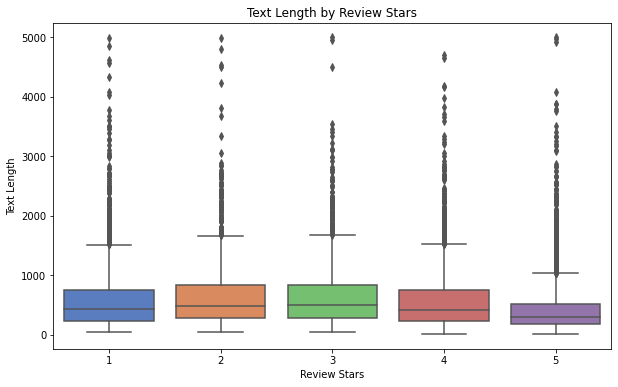

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='review_stars',y='text_length', 
            data = new_yelp_df, palette=sns.color_palette("muted")).set(title='Text Length by Review Stars', 
                                                                 xlabel='Review Stars', ylabel='Text Length')

[Text(0, 0.5, 'Review Counts'),
 Text(0.5, 0, 'Review Stars'),
 Text(0.5, 1.0, 'Review Counts by Review Stars')]

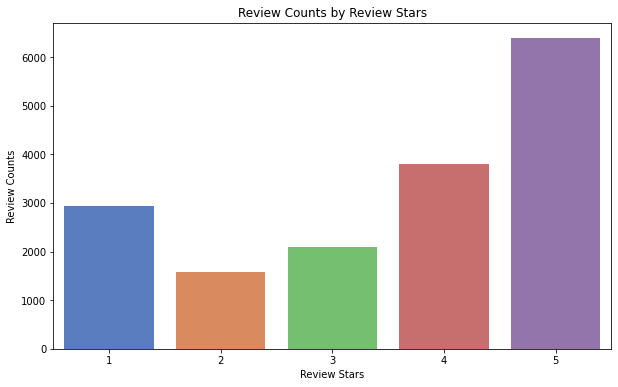

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='review_stars', 
              data = new_yelp_df, 
              palette=sns.color_palette("muted")).set(title='Review Counts by Review Stars', 
                                               xlabel='Review Stars', ylabel='Review Counts')


Text(0.5, 1.0, 'Heatmap of yelp_business_review Data')

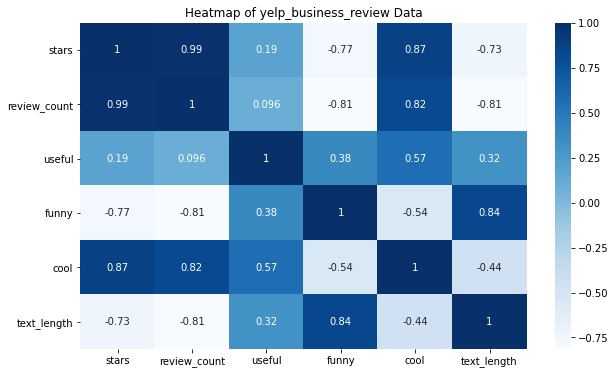

In [ ]:
stars = new_yelp_df.groupby('review_stars').mean()

plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(10, 250)
sns.heatmap(data=stars.corr(), annot=True, cmap="Blues")
plt.title("Heatmap of yelp_business_review Data")

In [ ]:
review_type = new_yelp_df.groupby('stars').sum()
review_type['stars'] = review_type.index
review_type.reset_index(inplace = True, drop = True)
review_type

,review_count,review_stars,useful,funny,cool,text_length,stars
0,1539,202,162,78,21,98972,1.0
1,21705,945,524,199,115,326271,1.5
2,71674,2167,1037,395,392,588889,2.0
3,128092,4416,1428,540,594,964555,2.5
4,179499,4591,1446,543,700,886863,3.0
5,855988,13456,4184,1541,1467,2004355,3.5
6,1678636,17814,4554,1827,2722,2420791,4.0
7,454030,8974,2322,881,1541,1063360,4.5
8,569049,6890,1687,478,1149,591928,5.0


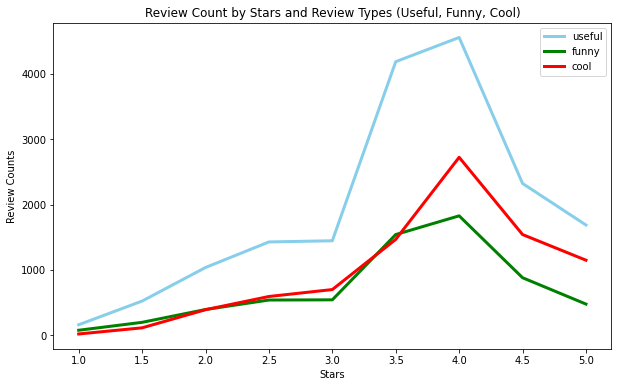

In [ ]:
plt.figure(figsize=(10,6))

plt.plot( 'stars', 'useful', data=review_type, markerfacecolor='blue', color='skyblue', linewidth=3, label = 'useful')
plt.plot( 'stars', 'funny', data=review_type, color='green', linewidth=3, label = 'funny')
plt.plot( 'stars', 'cool', data=review_type, color='red', linewidth=3, label="cool")
plt.title('Review Count by Stars and Review Types (Useful, Funny, Cool)')
plt.xlabel('Stars')
plt.ylabel('Review Counts')
plt.legend()

## Preprocessing for Labeled Data

import csv "yelp_review_with_labels"

In [ ]:
label_link = 'https://drive.google.com/file/d/1GJ-OFFtkgCUQ-RzHxjRS6FcvL28-GW8q/view?usp=sharing'
  
label_id = label_link.split("/")[-2] 
  
new_downloaded = drive.CreateFile({'id':label_id})  
new_downloaded.GetContentFile('yelp_review_with_labels.csv')  

In [ ]:
label_data=pd.read_csv("yelp_review_with_labels.csv")

In [ ]:
label_data.columns

Index(['business_id', 'name', 'city', 'state', 'stars', 'review_count',
       'categories', 'review_id', 'review_stars', 'useful', 'funny', 'cool',
       'text', 'date', 'polarity'],
      dtype='object')

In [ ]:
label_data.shape

(16769, 15)

In [ ]:
label_data.head(5)

,business_id,name,city,state,stars,review_count,categories,review_id,review_stars,useful,funny,cool,text,date,polarity
0,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",rFfxQEA9wCmRYyqDSv1ecQ,4,0,1,0,Went here for all you can eat sushi dinner! Bo...,2017-11-11 19:16:19,0
1,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",MccdpC7TvFCTKO5Pdx37PA,1,1,1,0,The service was okay when it was present. The ...,2016-02-27 08:03:55,0
2,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",OS_uA1Dm7iV4NLGcgtZ9qw,5,0,0,1,Went here on the weekend for lunch and food/se...,2015-11-09 23:03:17,1
3,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",q37oYWTdZmXC8Z26nTR87Q,5,0,0,0,I've eaten here twice now and I'm really impre...,2017-07-12 16:52:23,1
4,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",5w3lP3O8ZUO9kOTfQFi8pQ,1,1,1,1,Not good for groups.\n We came here tonight fo...,2016-04-04 05:57:54,0


In [ ]:
label_data.groupby('polarity').polarity.count()

polarity
0     5687
1    11082
Name: polarity, dtype: int64

In [ ]:
#lowercase conversion  
label_data['text'] = [i.lower() for i in label_data['text']]
label_data['text'][0]

"went here for all you can eat sushi dinner! bottomline: best all you can eat sushi in calgary! it costs $26 per person for sushi and sashimi and $32 for the deluxe menu which includes oysters and tataki. \n\nwe went a little overboard with ordering rolls (to the point that the waiter asked if we were sure we can finish haha) and then regretted it shortly after! there is a charge for unfinished food so it was a little stressful haha \n\nwe ordered the mango dragon roll (prawn tempura and avacado with mango), philadelphia roll, spicy salmon roll, beef udon, miso soup, salmon and tuna sashimi, salmon rose and prawn tempura. out of these my favourites were the spicy salmon and the mango dragon roll. i didn't love the tempura personally because it was a bit soggy. didn't have room for dessert after all this food so can't comment on that haha"

In [ ]:
import nltk

In [ ]:
#stopword removal 
from nltk.corpus import stopwords
nltk.download('stopwords')

Stopwords = set(stopwords.words('english'))

label_data["text"] = label_data["text"].apply(lambda text: " ".join([word for word in str(text).split() if word not in Stopwords]))
label_data['text'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"went eat sushi dinner! bottomline: best eat sushi calgary! costs $26 per person sushi sashimi $32 deluxe menu includes oysters tataki. went little overboard ordering rolls (to point waiter asked sure finish haha) regretted shortly after! charge unfinished food little stressful haha ordered mango dragon roll (prawn tempura avacado mango), philadelphia roll, spicy salmon roll, beef udon, miso soup, salmon tuna sashimi, salmon rose prawn tempura. favourites spicy salmon mango dragon roll. love tempura personally bit soggy. room dessert food can't comment haha"

In [ ]:
#punctuation removal + number removal + space/blank removal 
import string
import re
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # remove leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

label_data["text"]=label_data['text'].map(lambda text: clean_text(text))


In [ ]:
label_data['text'][0]

'went eat sushi dinner bottomline best eat sushi calgary costs per person sushi sashimi deluxe menu includes oysters tataki went little overboard ordering rolls to point waiter asked sure finish haha regretted shortly after charge unfinished food little stressful haha ordered mango dragon roll prawn tempura avacado mango philadelphia roll spicy salmon roll beef udon miso soup salmon tuna sashimi salmon rose prawn tempura favourites spicy salmon mango dragon roll love tempura personally bit soggy room dessert food cant comment haha'

In [ ]:
#lemmatization
import nltk
nltk.download('wordnet')
from textblob import Word
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

# Lemmatize final review format
label_data['lemmatized_text'] = label_data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
label_data['lemmatized_text'][0]

'went eat sushi dinner bottomline best eat sushi calgary cost per person sushi sashimi deluxe menu includes oyster tataki went little overboard ordering roll to point waiter asked sure finish haha regretted shortly after charge unfinished food little stressful haha ordered mango dragon roll prawn tempura avacado mango philadelphia roll spicy salmon roll beef udon miso soup salmon tuna sashimi salmon rose prawn tempura favourite spicy salmon mango dragon roll love tempura personally bit soggy room dessert food cant comment haha'

In [ ]:
label_data['text'][0]

'went eat sushi dinner bottomline best eat sushi calgary costs per person sushi sashimi deluxe menu includes oysters tataki went little overboard ordering rolls to point waiter asked sure finish haha regretted shortly after charge unfinished food little stressful haha ordered mango dragon roll prawn tempura avacado mango philadelphia roll spicy salmon roll beef udon miso soup salmon tuna sashimi salmon rose prawn tempura favourites spicy salmon mango dragon roll love tempura personally bit soggy room dessert food cant comment haha'

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

label_data["stem_text"] = label_data["text"].apply(lambda text: " ".join([stemmer.stem(word) for word in text.split()]))

In [ ]:
label_data['stem_text'][0]

'went eat sushi dinner bottomlin best eat sushi calgari cost per person sushi sashimi delux menu includ oyster tataki went littl overboard order roll to point waiter ask sure finish haha regret shortli after charg unfinish food littl stress haha order mango dragon roll prawn tempura avacado mango philadelphia roll spici salmon roll beef udon miso soup salmon tuna sashimi salmon rose prawn tempura favourit spici salmon mango dragon roll love tempura person bit soggi room dessert food cant comment haha'

## Split train and test dataset

In [ ]:
X=label_data["text"]
X.head(5)

0    went eat sushi dinner bottomline best eat sush...
1    service okay present menu particularly eat sus...
2    went weekend lunch foodservice fantastic never...
3    ive eaten twice im really impressed get lot pr...
4    good groups came tonight birthday dinner group...
Name: text, dtype: object

In [ ]:
y=label_data["polarity"]
y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: polarity, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Tokenizer + Pad Sequence

In [ ]:
from keras.preprocessing.text import Tokenizer
# Number of words to consider as features
# restrict the yelp reviews to the top 10000 most common words
max_features=10000
# Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train)+list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
# cut reviews after 200 words
maxlen=200
X_train=pad_sequences(X_train,maxlen=maxlen) #training data contains a list of list of numbers 
X_test=pad_sequences(X_test,maxlen=maxlen) #each list has the same numbers 

In [ ]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)

X_train (11738, 200)
y_train (11738,)


In [ ]:
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_test (5031, 200)
y_test (5031,)
